In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Read Data
apple_data = pd.read_csv("./test-data/apple_quality.csv")
apple_data
# Remove last row it contains a string
apple_data.drop(apple_data.index[-1], inplace=True)
apple_data.tail()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


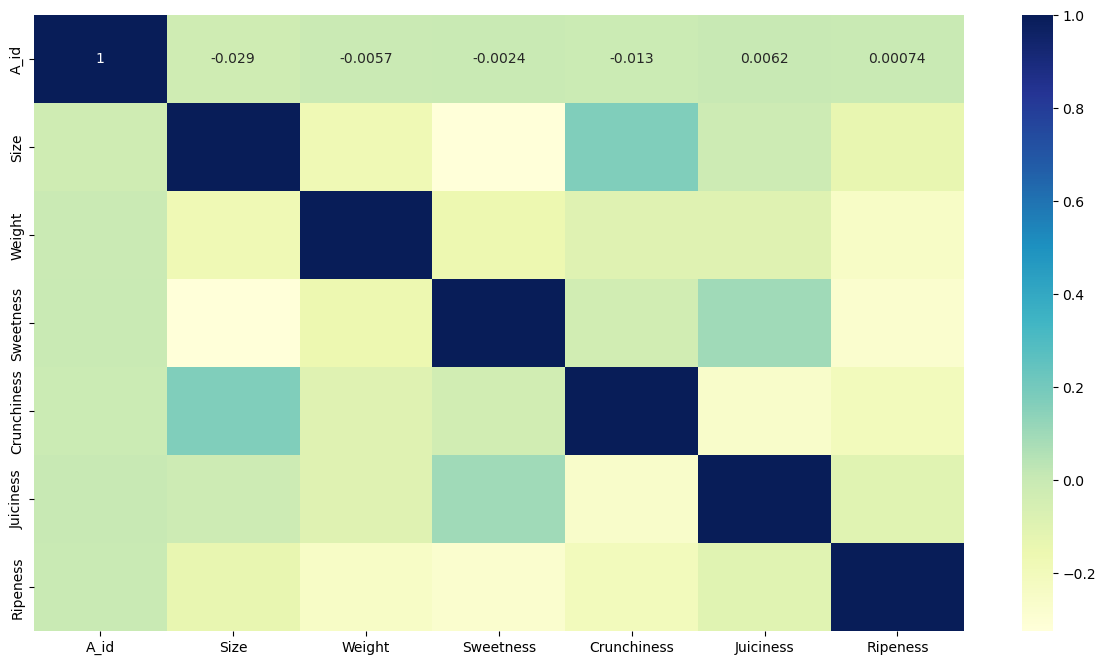

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(apple_data.corr(numeric_only=True), annot=True, cmap='YlGnBu');

In [8]:
# Split data into features and labels
X = apple_data.drop('Quality', axis=1) # features
y = apple_data['Quality'] # labels

In [9]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # test with 80% of data

In [10]:
# Select classification model
from sklearn.ensemble import RandomForestClassifier
# Init model
clf = RandomForestClassifier()

In [11]:
# Fit training data to model
clf.fit(X_train, y_train);

In [12]:
# Make prediction
y_preds = clf.predict(X_test)
y_preds[:10]

array(['good', 'good', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'bad',
       'good'], dtype=object)

In [13]:
# Evaluate model on training data
score_train = clf.score(X_train, y_train)
score_train

1.0

In [14]:
# Evaluate model on test data
score_test = clf.score(X_test,y_test)
score_test

0.8925